# Homework 3: Cats and Dogs
Applied Neural Networks <br/>
Dr. Leslie Kerby

Kaggle contains many useful datasets and data science competitions. It also has great tutorials and discussion boards. The data for this assignment comes from the [Kaggle Cats vs Dogs competition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview). Images such as these were once used for CAPTCHA (after digits and the alphabet proved too crackable). As stated in the overview, many years ago computer vision experts posited that a classifier with better than 60% accuracy would be difficult without a major advance in the state of the art (you should do better than this even without using CNNs). However, even back in 2014 state of the art machine learning could exceed 80% accuracy on this cat and dog dataset. This meant it was no longer useful for CAPTCHA. Currently, with the utilization of transfer learning this accuracy can exceed 95%.  

**Part 1** <br/>
Download the dataset. Go to [this link](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/) and set up your computer and Colab to easily download Kaggle datasets. Then download the `dogs-vs-cats-redux-kernels-edition` dataset. <br/>
*Note: You may set up the dataset another way (run jupyter locally etc) if you prefer*

In [1]:
#Setting up Kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 42.1MB/s]
 98% 530M/544M [00:03<00:00, 169MB/s]
100% 544M/544M [00:03<00:00, 166MB/s]
100% 270M/271M [00:01<00:00, 171MB/s]
100% 271M/271M [00:01<00:00, 174MB/s]


In [2]:
! mkdir train
! ls

kaggle.json  sample_data  sample_submission.csv  test.zip  train  train.zip


In [3]:
# unzip the training data all into the newly created training directory
! unzip train.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519

**Part 2**<br/>
Preprocess the dataset (load it into one dataframe and create your `y` labels). <br/> 
Print 5 sample images of dogs and cats (BEFORE they have been resized).

In [4]:
# You may find the following code hints useful

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(15)
tf.random.set_seed(15)

# filenames is a list of all the files we put in the training directory
filenames = os.listdir("train/train/")
# empty list of categories that will be the labels. THIS LIST WILL BE Y
categories = []
# for every file, we split the file name where there is a '.'
# we only keep the first element that was split, which will be
# either 'dog' or 'cat'
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)

# Create a dataframe that holds the name (y) of the file and
# the category (x)
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
# Note: this randomizes the filenames

In [5]:
df.head(10)

,filename,category
0,dog.10496.jpg,0
1,cat.1180.jpg,1
2,dog.4375.jpg,0
3,dog.2119.jpg,0
4,dog.11736.jpg,0
5,cat.1488.jpg,1
6,dog.1482.jpg,0
7,cat.9417.jpg,1
8,cat.7699.jpg,1
9,dog.2792.jpg,0


<Figure size 432x288 with 0 Axes>

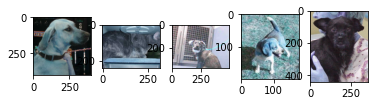

In [6]:
# print the first 5 image files from the dataframe and see if they match their title
import cv2
sample_images = []
for i in range(5):
  img = cv2.imread('train/train/' + df['filename'][i], cv2.IMREAD_COLOR)
  sample_images.append(img)
plt.figure()
f, axarr = plt.subplots(1,5)
axarr[0].imshow(sample_images[0])
axarr[1].imshow(sample_images[1])
axarr[2].imshow(sample_images[2])
axarr[3].imshow(sample_images[3])
axarr[4].imshow(sample_images[4])

You can then take `df` and create `y` from it and add each image to `X` (in order as found in df). Note that the images are all different sizes -- so we will need to resize and interpolate them before inputing them in Keras.

In [7]:
# We haven't covered this yet so I'm giving you the code 
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

X = np.ndarray((25000,80,80,3)) # 25000 images, 80x80 pixels, 3 channels (RGB) 
for i,image_file in enumerate(df['filename']):
    X[i,:] = resize_img('train/train/'+image_file)


In [ ]:
# Print the first element to see its shape
X[0].shape

(80, 80, 3)

In [ ]:
# 80 * 80 * 3 * 25,000 is 480,000,000 so the array is the right size
X.size

480000000

In [ ]:
df.shape

(25000, 2)

**Part 3**<br/>
Now split the training data into training (15000 images), validation (5000 images), and testing (5000 images) datasets.

In [8]:
from sklearn.model_selection import train_test_split

Y = categories
Y = np.array(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=5000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=5000)

In [ ]:
X_train.shape

(15000, 80, 80, 3)

In [ ]:
X_test.shape

(5000, 80, 80, 3)

In [ ]:
X_val.shape

(5000, 80, 80, 3)

In [ ]:
y_train.shape

(15000,)

In [ ]:
y_train[0]

1

In [ ]:
y_test[0]

1

In [ ]:
y_val[0]

1

In [ ]:
type(y_train)

numpy.ndarray

**Part 4**<br/>
Try different NN architectures and options. Use KerasTuner (or alternatively the sklearn tools RandomizedSearchCV or GridSearchCV) as part of this. Try at least one deep neural network with at least 50 hidden layers. Clearly state initialization, activation, architecture (including # layers and neurons, and pathways), any normalization/regularization used, and other relevant information for each model. 

You are NOT expected to utilize transfer learning, data augmentation, or convolutional neural networks (these will be added in a future assignment). 

Give converged validation and testing accuracy for each model trained (utilizing the EarlyStopping callback). Which one was the best? Display five misclassified images from your best model. Why do you think it was the best? Note: Your grade for this homework will depend on the quality of your best model.

In [9]:
! pip install -q -U keras-tuner
#! pip install keras-tuner --upgrade

     |████████████████████████████████| 98 kB 3.2 MB/s 


### Testing Setting up Tuner

In [ ]:
# activation='sigmoid' for binary not softmax
# BinaryCrossentropy for loss function
# The final output should be 1 node, result either true or false
# metrics = accuracy, 
# shape of data should be a 4-tuple NHWC (instances, height, width, channels(rgb))
import keras_tuner as kt
from keras.models import Sequential
from keras import optimizers

def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(80, 80, 3)))

  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)

  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])
  return model


In [ ]:
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=5)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Trial 11 Complete [00h 00m 42s]
val_accuracy: 0.5519999861717224

Best val_accuracy So Far: 0.592199981212616
Total elapsed time: 00h 03m 06s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 512
learning_rate: 0.01
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.592199981212616
Trial summary
Hyperparameters:
units: 192
learning_rate: 0.0001
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.5698000192642212
Trial summary
Hyperparameters:
units: 288
learning_rate: 0.0001
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 427be086e6a905e0cf7dcc8a75275153
Score: 0.5612000226974487
Trial summary
Hyperparameters:
units: 288
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.5551999807357788
Trial summary
Hyperparameters:
units: 480
learning_rate: 0.01
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.5519999861717224
Trial summary
Hyperparameters:
uni

In [ ]:
best_hps = tuner.get_best_hyperparameters()
best_hps
best_hps[0].get('learning_rate')

0.01

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model

In [ ]:
hyper_model = tuner.hypermodel.build(best_hps[0])

In [ ]:
hyper_model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
469/469 [==============================] - 8s 14ms/step - loss: 1002.7431 - accuracy: 0.5424 - val_loss: 0.6713 - val_accuracy: 0.5932
Epoch 2/25
469/469 [==============================] - 6s 12ms/step - loss: 0.6585 - accuracy: 0.6134 - val_loss: 0.6615 - val_accuracy: 0.6000
Epoch 3/25
469/469 [==============================] - 5s 12ms/step - loss: 0.6518 - accuracy: 0.6194 - val_loss: 0.6627 - val_accuracy: 0.5974
Epoch 4/25
469/469 [==============================] - 5s 12ms/step - loss: 0.6607 - accuracy: 0.6047 - val_loss: 0.6732 - val_accuracy: 0.5780
Epoch 5/25
469/469 [==============================] - 6s 13ms/step - loss: 0.6629 - accuracy: 0.5912 - val_loss: 0.6739 - val_accuracy: 0.5850
Epoch 6/25
469/469 [==============================] - 6s 13ms/step - loss: 0.6794 - accuracy: 0.5521 - val_loss: 0.6810 - val_accuracy: 0.5470
Epoch 7/25
469/469 [==============================] - 6s 13ms/step - loss: 0.6795 - accuracy: 0.5597 - val_loss: 0.6808 - val_accuracy: 0.5

#**Evaluation So Far**
Up to this point the model was implemented purely to see if everything was set up correctly and running as intended. I wanted to make sure this was correct because these processes take time and a lot of RAM memory apparently... So the number of epochs is very low and the model itself has 1 layer and an output which is hardly effective at identifying images. Even with only 1 layer however, I found it surprising the model got at best a 60% accuracy on the validation data. That's slightly better than guessing for such a simple model. 

Next I will improve upon the model to achieve an accuracy higher than 60%

initialization, activation, architecture (including # layers and neurons, and pathways), any normalization/regularization. Give converged validation and testing accuracy for each model trained (utilizing the EarlyStopping callback)

In [10]:
# links for me so I have quick access to the api docs
# https://keras.io/api/keras_tuner/ 

# A model with 50 layers
# Initilaizers: kernel_initializer="glorot_uniform", bias_initializer="zeros"
# Activation: relu, sigmoid for output
# Architecture: 
# Accuracy: Change it to 'keras.metrics.BinaryAccuracy()' instead of just accuracy
# Normalization/Regularization
import keras_tuner as kt

def build_model_2(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(80, 80, 3)))

  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)

  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  
  for layer in range(50):
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))

  #for layer in range(hp.Int('layers', 2, 6)):
  #  model.add(keras.layers.Dense(units=hp.Int('units_' + str(layer), 50, 100, step=10), 
  #                               activation=hp.Choice('act_' + str(layer), ['relu', 'sigmoid']), 
  #                               kernel_initializer="glorot_uniform",
  #                               bias_initializer="zeros"))
  # Output layer
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  # keras.metrics.BinaryAccuracy() for accuracy?
  model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])
  return model

In [11]:
import keras_tuner as kt

tuner = kt.Hyperband(build_model_2, objective='val_accuracy', max_epochs=5)
tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

best_hps = tuner.get_best_hyperparameters()
best_hps[0].get('learning_rate')
best_model = tuner.get_best_models(num_models=1)[0]
hyper_model = tuner.hypermodel.build(best_hps[0])

Trial 8 Complete [00h 03m 04s]
val_accuracy: 0.5044000148773193

Best val_accuracy So Far: 0.5044000148773193
Total elapsed time: 00h 13m 48s

Search: Running Trial #9

Hyperparameter    |Value             |Best Value So Far 
units             |224               |160               
learning_rate     |0.001             |0.01              
tuner/epochs      |5                 |2                 
tuner/initial_e...|0                 |0                 
tuner/bracket     |0                 |1                 
tuner/round       |0                 |0                 

Epoch 1/5
469/469 [==============================] - 34s 66ms/step - loss: 0.6934 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5044
Epoch 2/5
144/469 [========>.....................] - ETA: 19s - loss: 0.6932 - accuracy: 0.4928

KeyboardInterrupt: ignored

In [ ]:
tuner = kt.RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train, 
             epochs=5, 
             validation_data=(X_val, y_val), 
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
units             |96                |?                 
layers            |6                 |?                 
units_0           |60                |?                 
act_0             |sigmoid           |?                 
units_1           |80                |?                 
act_1             |sigmoid           |?                 
learning_rate     |0.01              |?                 

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.6946 - binary_accuracy: 0.4953 - val_loss: 0.6933 - val_binary_accuracy: 0.4970
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6934 - binary_accuracy: 0.4997 - val_loss: 0.6933 - val_binary_accuracy: 0.4970
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.6934 - binary_accuracy: 0.4963 - val_loss: 0.6933 - val_binary_accuracy: 0.4970
Epoch 4/5
469/469 [==============================]

KeyboardInterrupt: ignored

In [12]:
hyper_model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=1)])

NameError: ignored

# **Part 4 Evaluation**
I came into an issue with trying to get my models to become any more accurate as well as multiple problems with Colab crashing from lack of RAM and needing to start over or being restricted from using the GPU at all since I wasn't a high priority user. So this part of the homework was not very effective for me. 
</br></br>
When attempting to increase the accuracy of the model, I attempted a few things. First I learned that keras.metrics.BinaryAccuracy() should be used for the accuracy metric instead of just 'accuracy', but switching seemed to have no effect and caused errors when fitting the model, so I went back to just using accuracy as a metric.
</br></br>
Next I tried changing the initializers and activation functions and both did nothing to change the results. Adding 50 layers also did not change the result in any way. I know adding 50+ layers should have a noticable effect, so my model is doing something incorrect when fitting, but I'm not sure what. 
</br></br>
Attempting to use different types of tuners didn't have any effect as well, still not changing the 50% accuracy of the model. After every model was fit, colab would crash and every step would need to be repeated in order to try another simple change again, making the process of testing models very slow and tedious. 
</br></br>
To conclude, I would have liked to have gotten more progress on this project, but the constant crashing and inability to change the model's accuracy made it pretty difficult. In the end I couldn't get the model to be any better than simply guessing.